# **CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT**

![alt the text here](https://img.freepik.com/free-vector/hand-drawn-credit-score-concept_23-2149164575.jpg?w=900&t=st=1725263174~exp=1725263774~hmac=197f3bc36eb5de8aa69feb5e64d9e8d59bbc6d5c7073f6ecda5fba4e53e791f0)

A credit score is a representation of an individual's creditworthiness, which is a measure of how likely they are to repay borrowed money on time.It is calculated based on information from a credit report, which includes an individual's borrowing history, payment history, and other financial factors.Credit scores are used by lenders to assess an individual's credit risk and determine whether or not to approve them for a loan.



*   **Credit scores offer several benefits for both individuals and organizations:**



1.   Improved Access to Credit: A good credit score can make it easier to obtain loans, credit cards, and other forms of credit at favorable terms.
2.   Lower Interest Rates: Individuals with high credit scores may qualify for lower interest rates on loans and credit cards, saving them money over time.


3.   Enhanced Financial Opportunities: A strong credit score can open doors to financial opportunities, such as renting a home or starting a business
4.   Efficient Decision-Making: For organizations, credit scores provide a valuable tool for assessing the creditworthiness of potential customers and making informed lending decisions.









*   **TARGET VARIABLE:** Credit_Score





# *   **IMPORTING THE DATA SET**  



In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [3]:
data=pd.read_csv('/content/credit (1).csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71595 entries, 0 to 71594
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        71595 non-null  int64  
 1   Customer_ID               71595 non-null  int64  
 2   Month                     71595 non-null  int64  
 3   Name                      71595 non-null  object 
 4   Age                       71595 non-null  float64
 5   SSN                       71595 non-null  float64
 6   Occupation                71595 non-null  object 
 7   Annual_Income             71595 non-null  float64
 8   Monthly_Inhand_Salary     71594 non-null  float64
 9   Num_Bank_Accounts         71594 non-null  float64
 10  Num_Credit_Card           71594 non-null  float64
 11  Interest_Rate             71594 non-null  float64
 12  Num_of_Loan               71594 non-null  float64
 13  Type_of_Loan              71594 non-null  object 
 14  Delay_

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,71595.000000,71595.000000,71595.000000,71595.000000,7.159500e+04,71595.000000,71594.000000,71594.000000,71594.000000,71594.000000,...,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000
mean,59327.750052,25970.093414,4.499895,33.291780,4.981830e+08,50482.506732,4195.088373,5.362977,5.530896,14.543621,...,21.108361,13.299578,10.456153,5.788125,1425.787331,32.306425,221.113836,108.384163,54.892004,392.642889
std,31001.760882,14316.172915,2.291319,10.739414,2.906156e+08,38342.245360,3188.764801,2.580359,2.062887,8.754838,...,14.769832,6.237142,6.631020,3.862011,1159.062633,5.115822,99.906864,134.229801,38.486223,201.682240
min,5634.000000,1006.000000,1.000000,14.000000,4.033120e+05,4.000000,319.556250,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.540000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,32480.500000,13868.000000,2.000000,24.000000,2.421530e+08,19286.260000,1628.973333,3.000000,4.000000,7.000000,...,10.000000,9.000000,5.330000,3.000000,562.340000,28.072922,144.000000,29.790433,27.862574,267.843983
50%,59327.000000,25750.000000,4.000000,33.000000,4.967989e+08,36857.220000,3077.136667,5.000000,5.000000,13.000000,...,18.000000,14.000000,9.370000,5.000000,1156.820000,32.348802,219.000000,66.860461,45.349407,333.812615
75%,86175.500000,38299.000000,6.000000,42.000000,7.536800e+08,71614.200000,5951.373333,7.000000,7.000000,20.000000,...,28.000000,18.000000,14.900000,9.000000,1945.680000,36.509769,302.750000,147.069096,71.082807,462.720836
max,113024.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,10.000000,11.000000,34.000000,...,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
data.shape

(71595, 28)

In [ ]:
data.size

2004660

In [ ]:
data.ndim

2

In [ ]:
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')



*   Majority of customers have poor credit score.





# *   **PREPROCESSING**



# **(1)MISSING VALUES**

In [ ]:
data.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0




*  There is no missing values in the data set



# **(2)OUTLIER**

In [ ]:
num_cols=['ID', 'Customer_ID', 'Month', 'Age', 'SSN',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

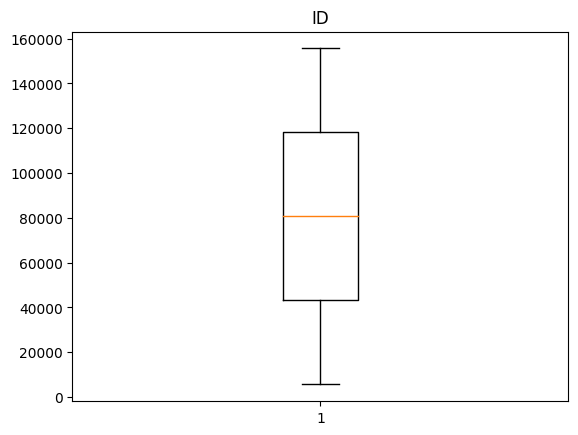

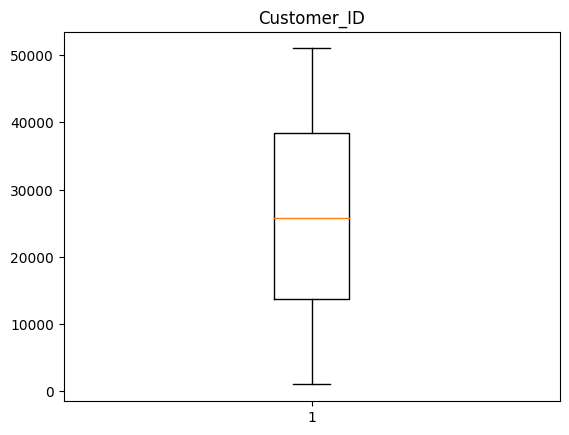

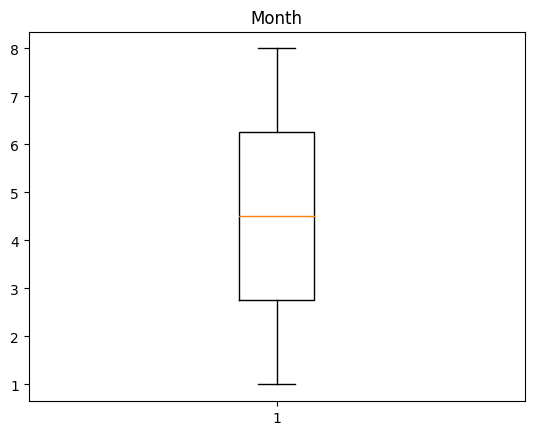

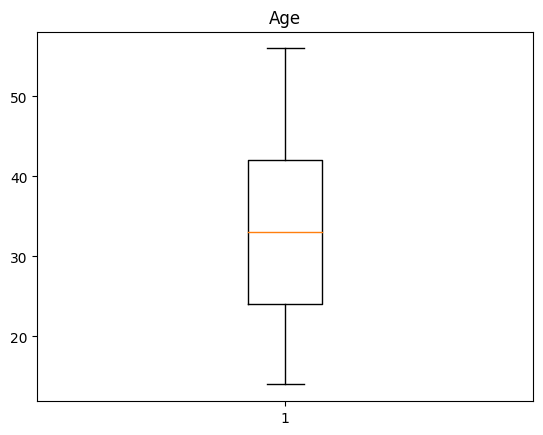

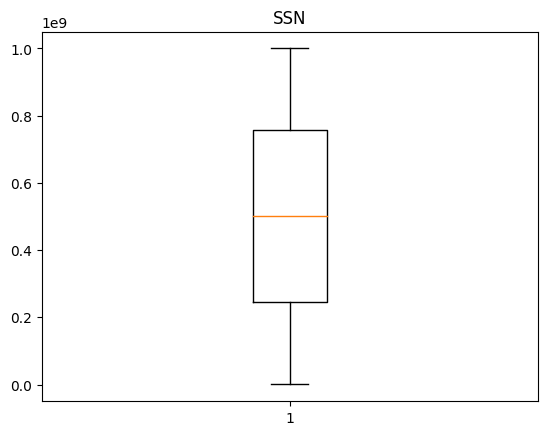

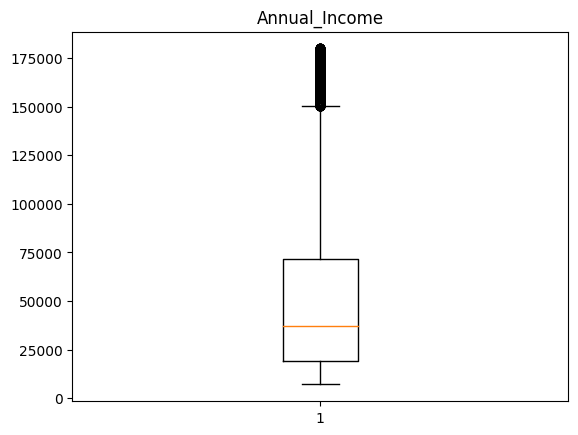

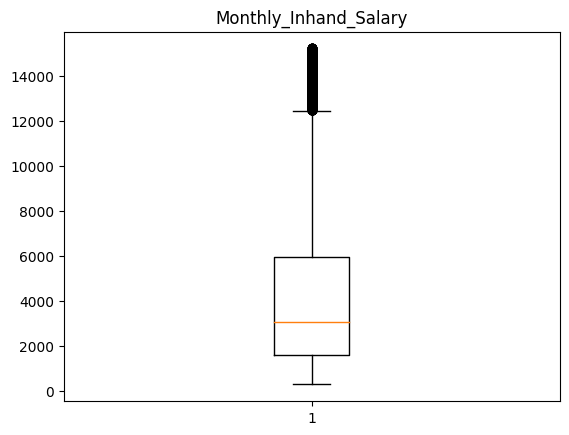

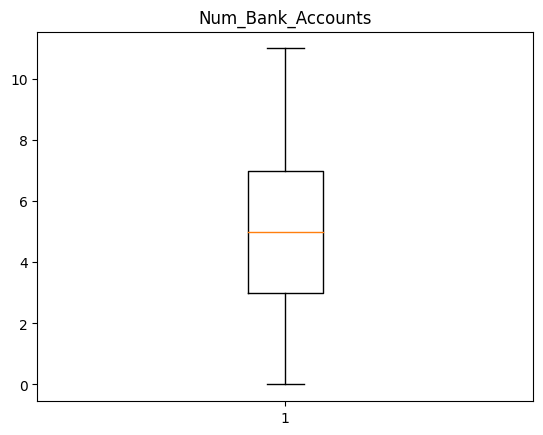

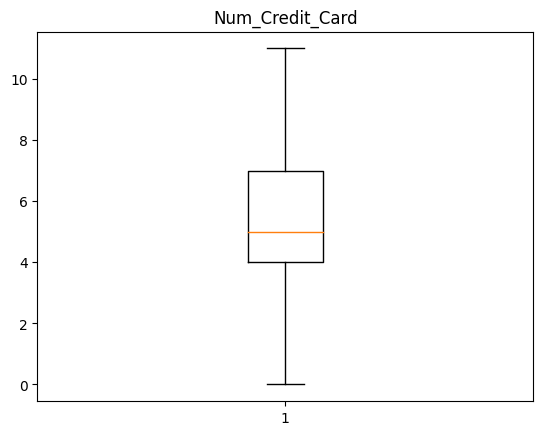

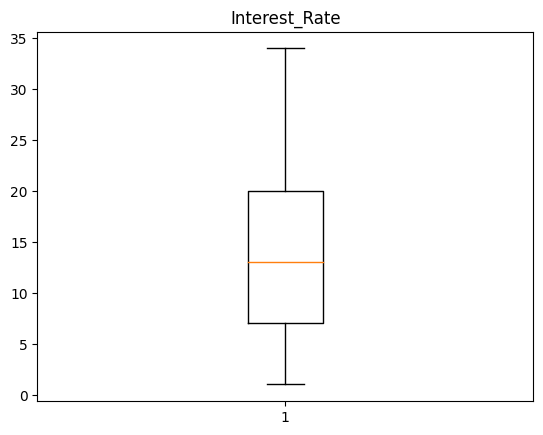

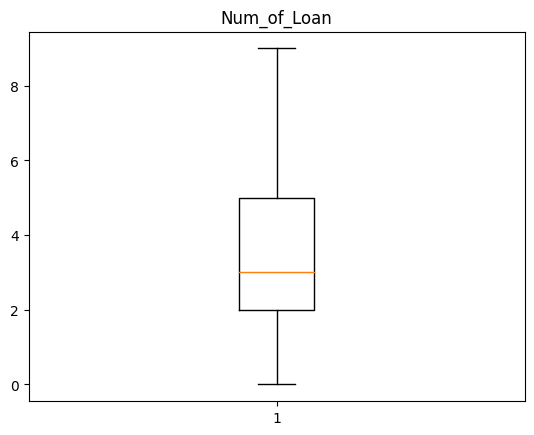

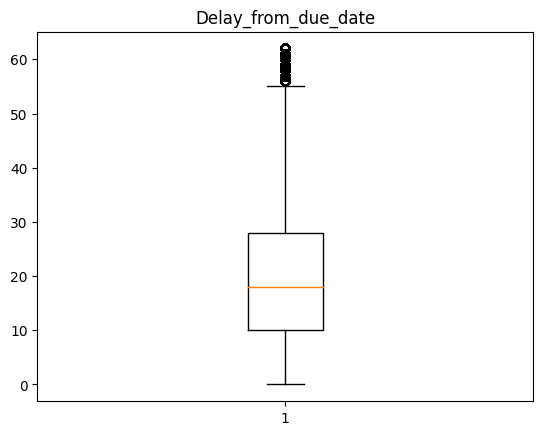

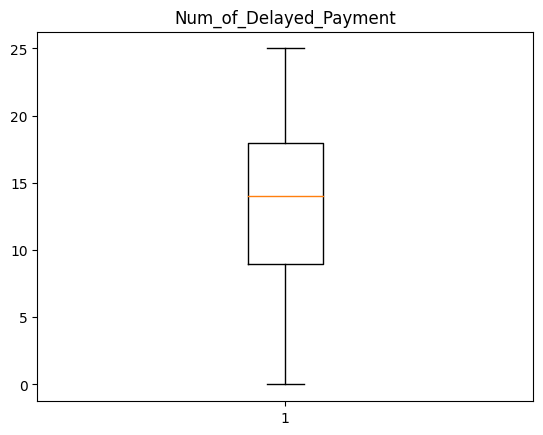

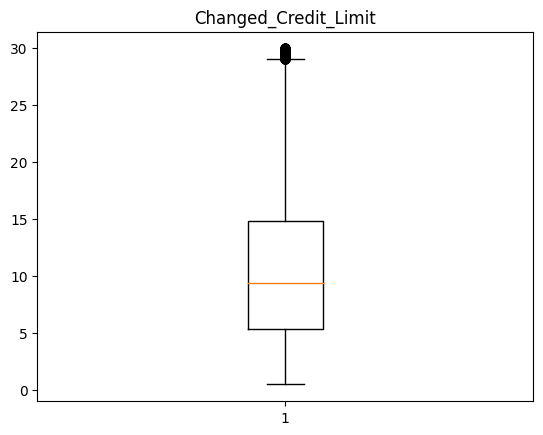

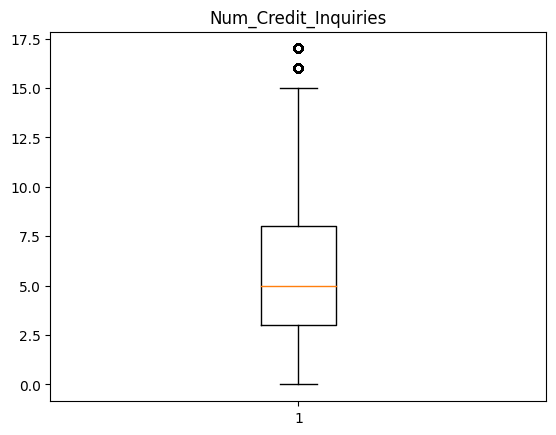

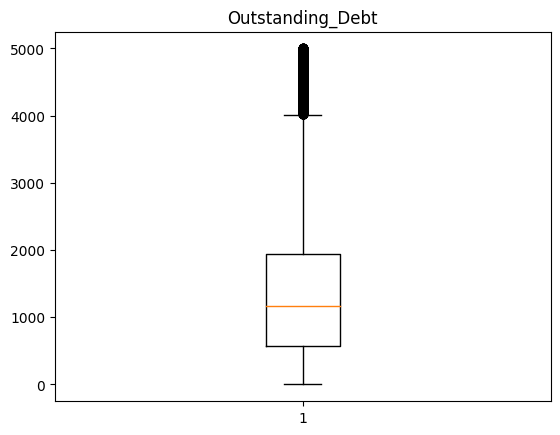

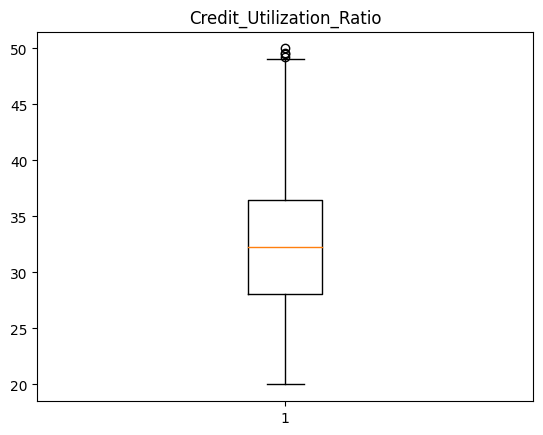

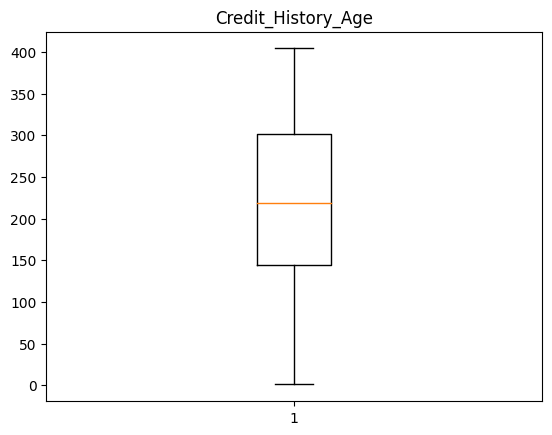

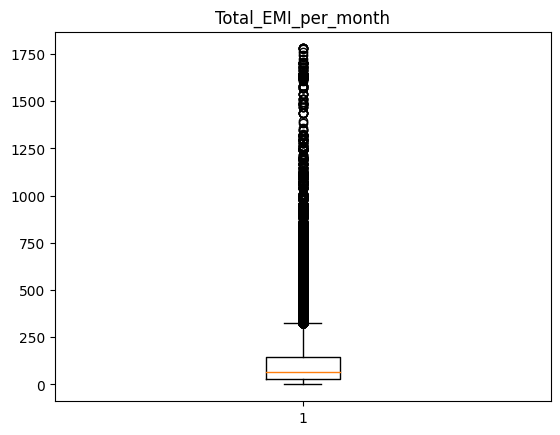

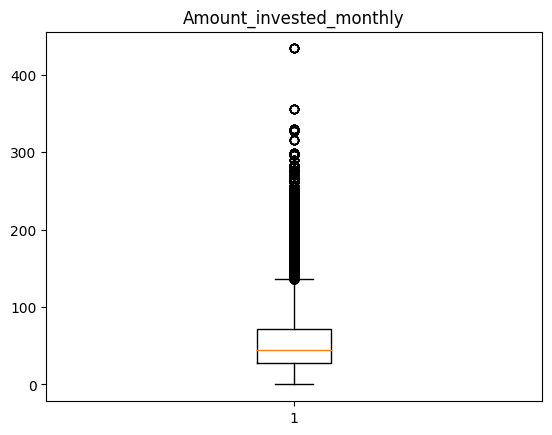

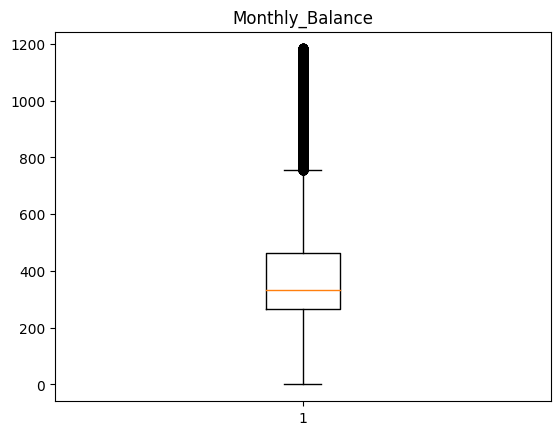

In [ ]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()



# *  OUTLIER CORRECTION





*   to show outliers



In [ ]:
# Dictionary to store quartiles and outliers
outliers = {}

In [ ]:
for col in num_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

ID: Q1=43132.75, Q2=80631.5, Q3=118130.25, Outliers=[]
Customer_ID: Q1=13664.5, Q2=25777.0, Q3=38385.0, Outliers=[]
Month: Q1=2.75, Q2=4.5, Q3=6.25, Outliers=[]
Age: Q1=24.0, Q2=33.0, Q3=42.0, Outliers=[]
SSN: Q1=245168577.25, Q2=500688611.5, Q3=756002666.25, Outliers=[]
Annual_Income: Q1=19342.9725, Q2=36999.705, Q3=71683.47, Outliers=[173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 155726.76, 155726.76, 155726.76, 155726.76, 155726.76



*   using clip fn to remove outlier



In [ ]:
for col in num_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }
        data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

ID: Q1=43132.75, Q2=80631.5, Q3=118130.25, Outliers=[]
Customer_ID: Q1=13664.5, Q2=25777.0, Q3=38385.0, Outliers=[]
Month: Q1=2.75, Q2=4.5, Q3=6.25, Outliers=[]
Age: Q1=24.0, Q2=33.0, Q3=42.0, Outliers=[]
SSN: Q1=245168577.25, Q2=500688611.5, Q3=756002666.25, Outliers=[]
Annual_Income: Q1=19342.9725, Q2=36999.705, Q3=71683.47, Outliers=[]
Monthly_Inhand_Salary: Q1=1626.594166666667, Q2=3095.905, Q3=5957.715, Outliers=[]
Num_Bank_Accounts: Q1=3.0, Q2=5.0, Q3=7.0, Outliers=[]
Num_Credit_Card: Q1=4.0, Q2=5.0, Q3=7.0, Outliers=[]
Interest_Rate: Q1=7.0, Q2=13.0, Q3=20.0, Outliers=[]
Num_of_Loan: Q1=2.0, Q2=3.0, Q3=5.0, Outliers=[]
Delay_from_due_date: Q1=10.0, Q2=18.0, Q3=28.0, Outliers=[]
Num_of_Delayed_Payment: Q1=9.0, Q2=14.0, Q3=18.0, Outliers=[]
Changed_Credit_Limit: Q1=5.38, Q2=9.4, Q3=14.85, Outliers=[]
Num_Credit_Inquiries: Q1=3.0, Q2=5.0, Q3=8.0, Outliers=[]
Outstanding_Debt: Q1=566.0725, Q2=1166.155, Q3=1945.9625, Outliers=[]
Credit_Utilization_Ratio: Q1=28.05256656125577, Q2=32.3

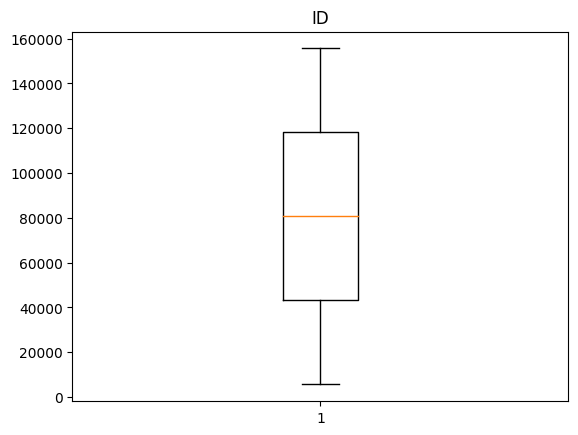

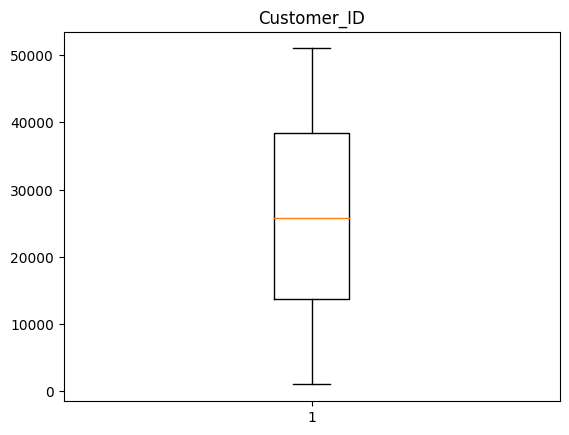

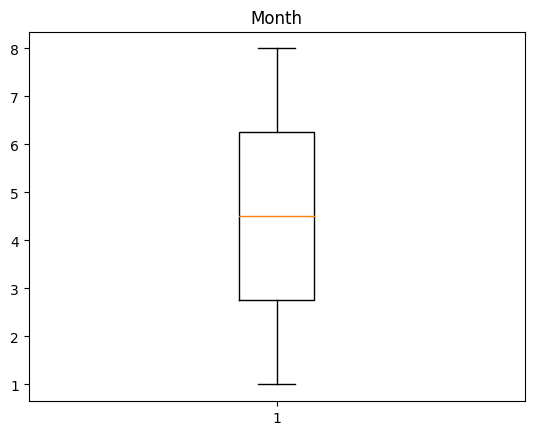

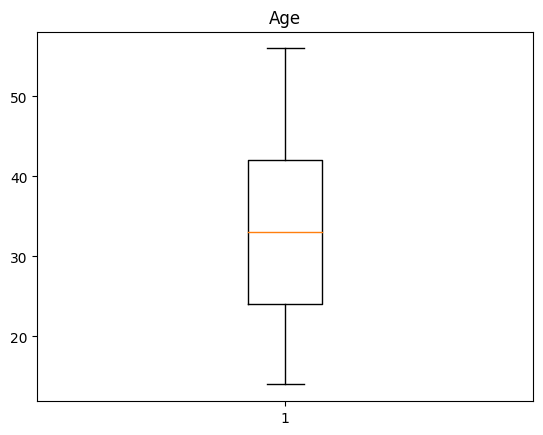

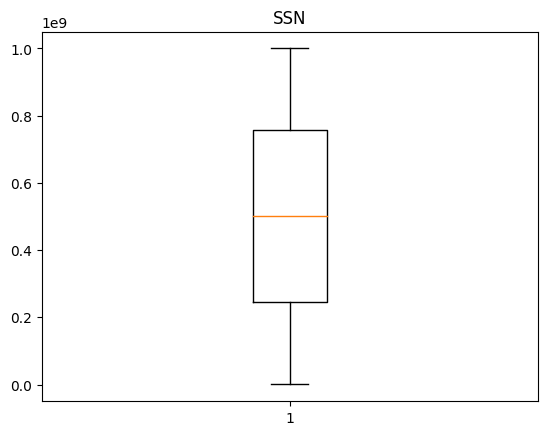

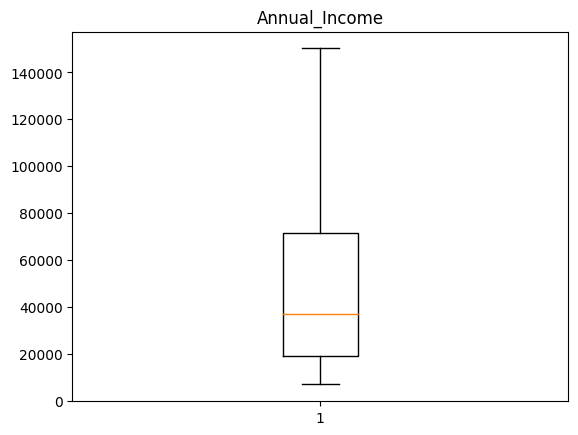

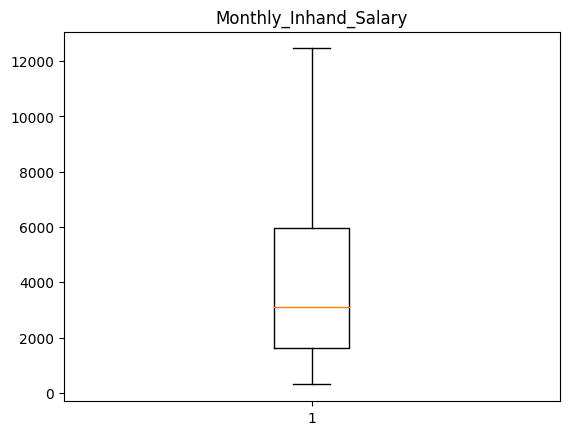

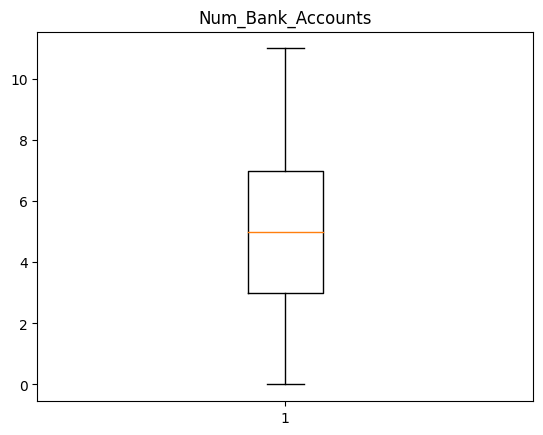

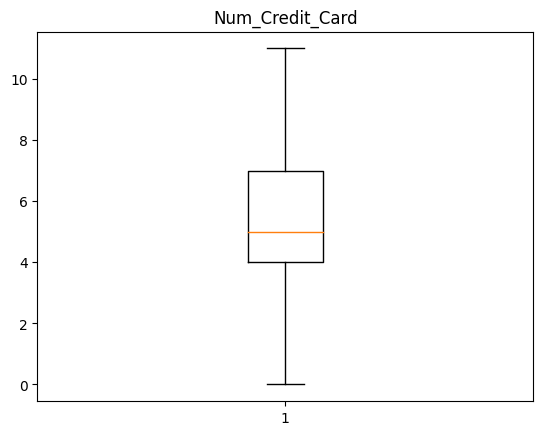

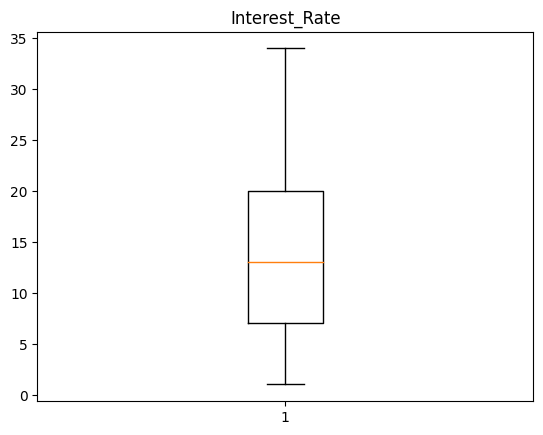

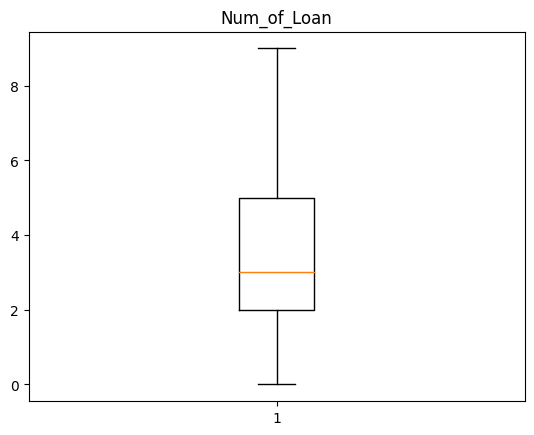

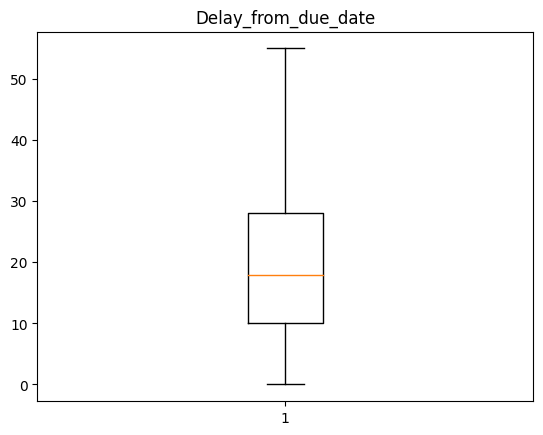

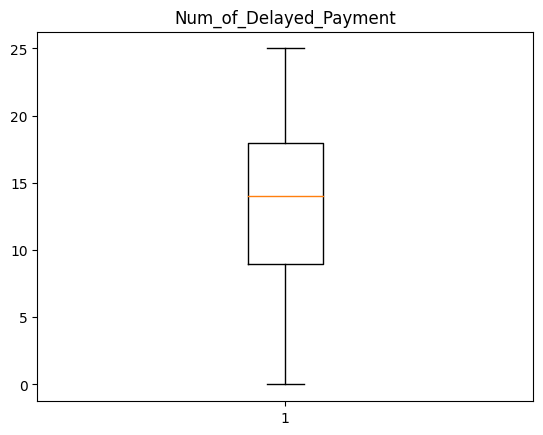

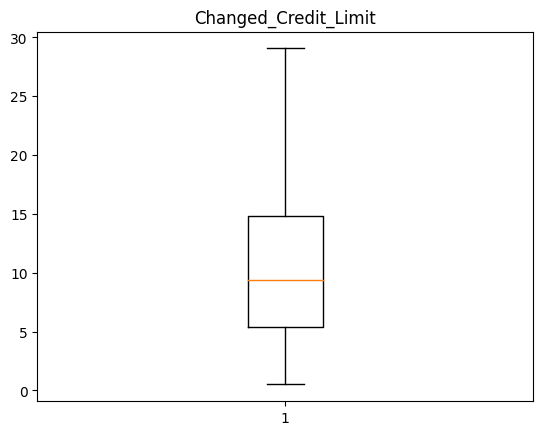

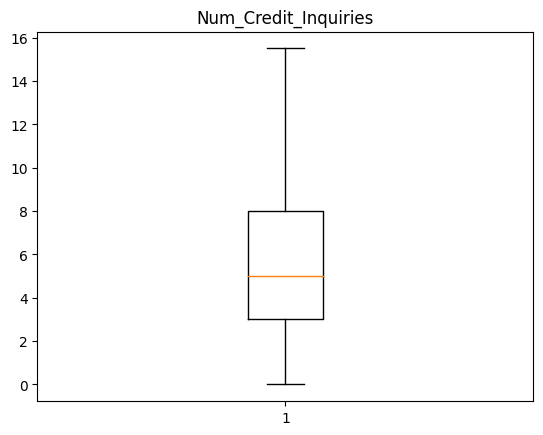

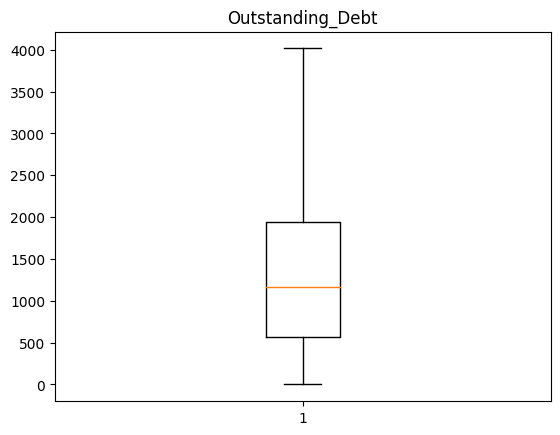

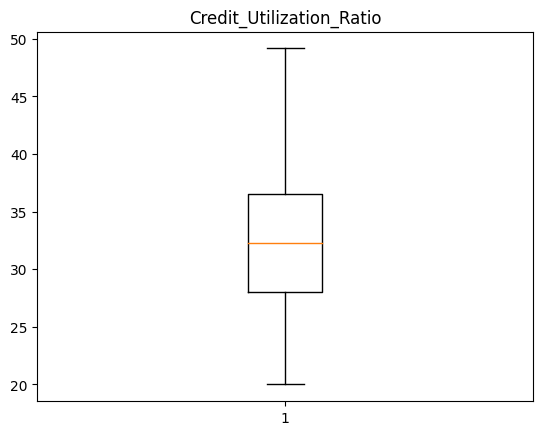

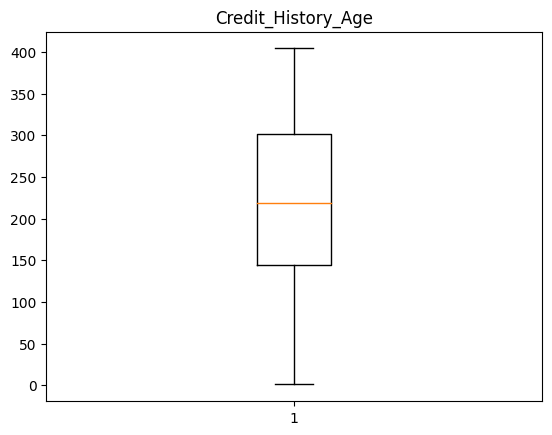

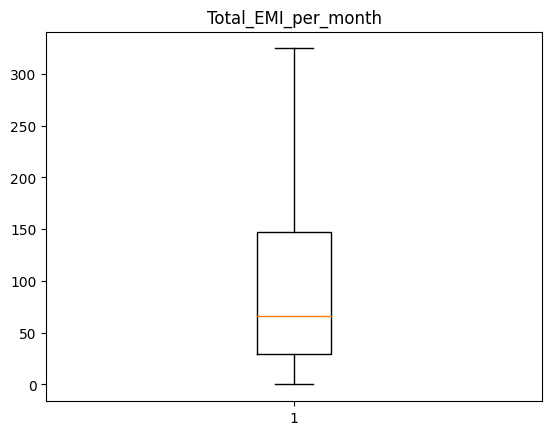

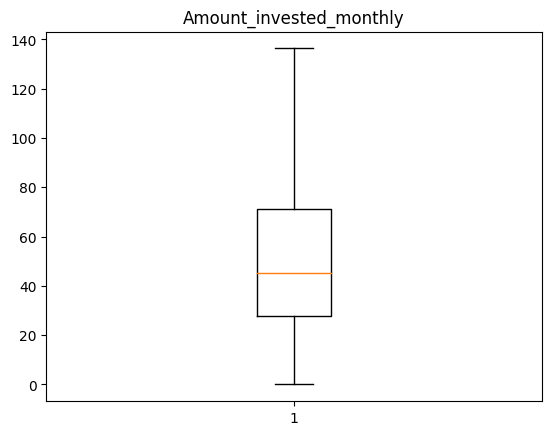

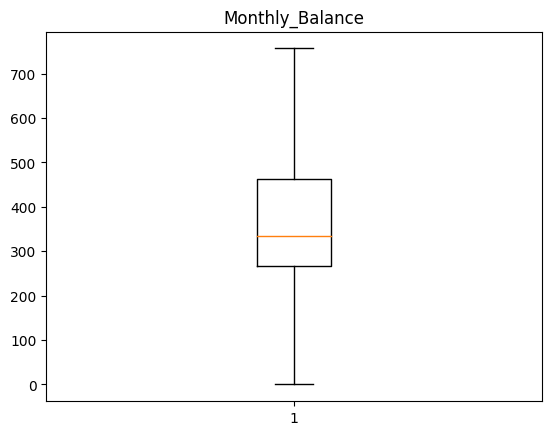

In [ ]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

# **UNIVARIATE ANALYSIS**

# **Describe**

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50186.981140,4169.919819,5.368820,5.533570,14.53208,...,20.918030,13.313120,10.467515,5.791275,1399.859920,32.285156,221.220460,98.586705,53.462628,381.369139
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,37373.604108,3106.876173,2.593314,2.067098,8.74133,...,14.395621,6.237166,6.601442,3.849239,1086.193704,5.116818,99.680716,92.290727,33.641866,172.147669
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.000000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,150194.216250,12454.396250,11.000000,11.000000,34.00000,...,55.000000,25.000000,29.055000,15.500000,4015.797500,49.162808,404.000000,324.578103,136.300826,756.615233


In [ ]:
col=['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']

# **VALUE COUNTS IN EACH COLUMNS**

In [ ]:
for column in col:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

Value counts for ID:
ID
5634      1
105608    1
105642    1
105637    1
105636    1
         ..
55629     1
55628     1
55627     1
55626     1
155629    1
Name: count, Length: 100000, dtype: int64


Value counts for Customer_ID:
Customer_ID
3392     8
39924    8
23267    8
48794    8
18548    8
        ..
11956    8
30819    8
40329    8
49221    8
37932    8
Name: count, Length: 12500, dtype: int64


Value counts for Month:
Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64


Value counts for Name:
Name
Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: count, Length: 10128, dtype: int64


Value counts for Age:
Age
38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    295

# **EDA(Exploratory Data Analysis)**

# **Distribution of the target variable (Credit_Score)**

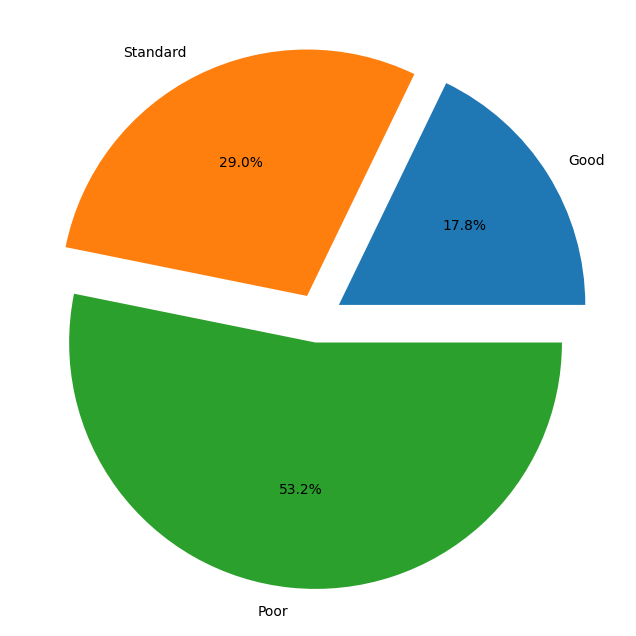

In [ ]:
plt.figure(figsize=(8,8))
pie = data.groupby('Credit_Score')['Credit_Score'].count()
plt.pie(pie, explode=[0.1, 0.1,0.1], labels=['Good', 'Standard','Poor'], autopct='%1.1f%%');



*   Majority of the customers have poor credit score



# **Histograms for numerical features**

In [ ]:
numerical_col=data.select_dtypes(include=['int64','float64']).columns
numerical_col

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

# **(1)Histograms for Age**

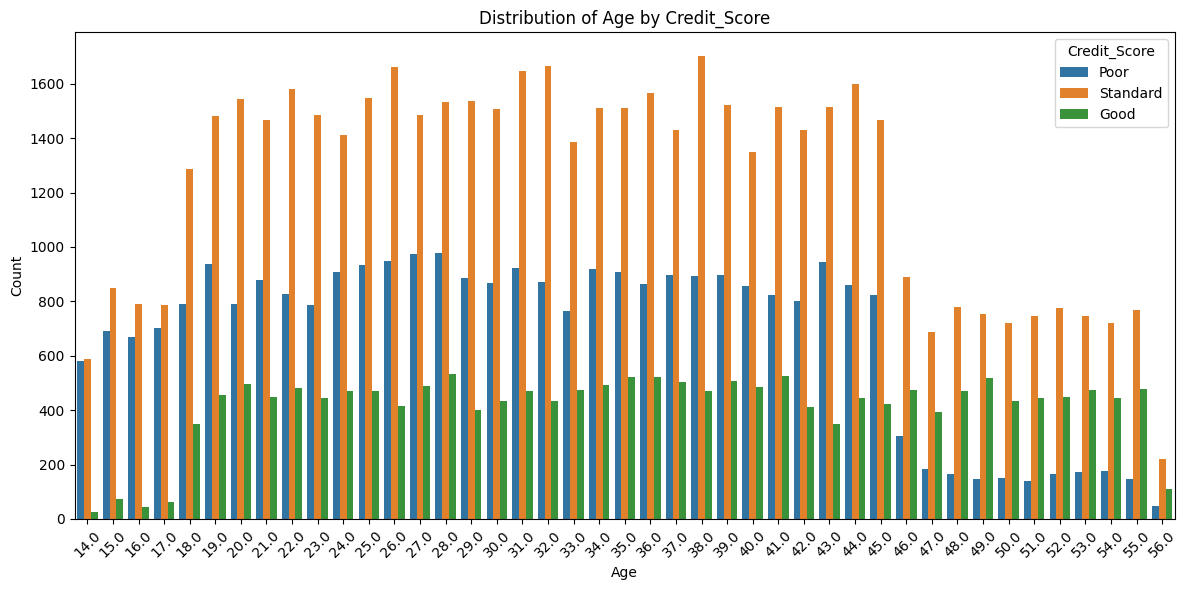

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Credit_Score', data=data)
plt.title('Distribution of Age by Credit_Score')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()





*    Older individuals tend to have better credit scores, possibly due to more established credit history.



# **(2)Histograms for Month**

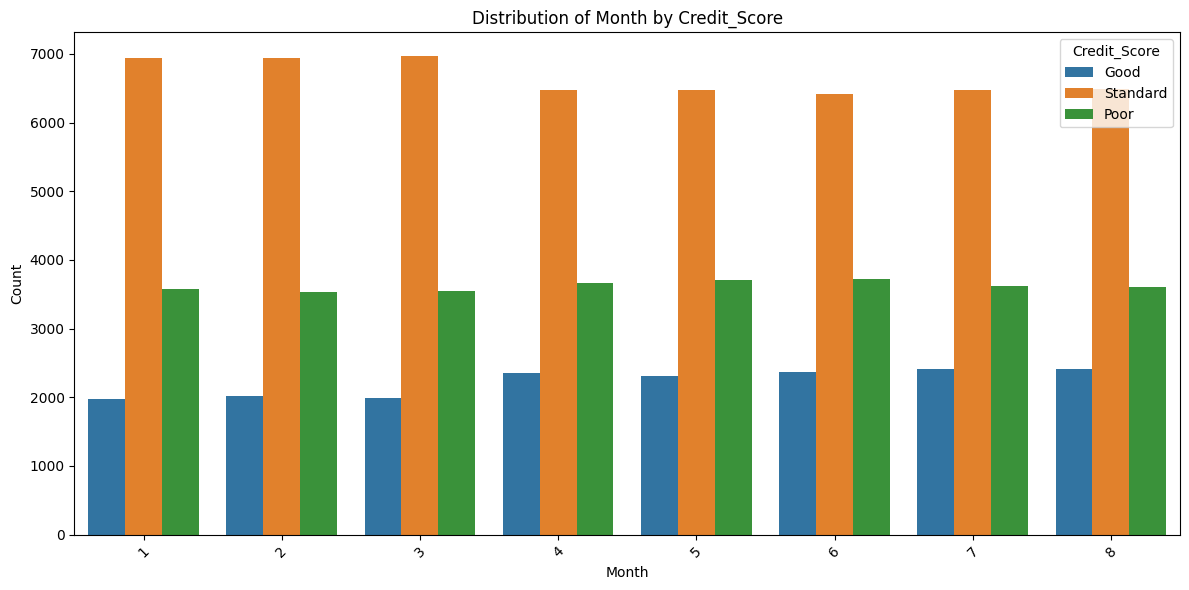

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Credit_Score', data=data)
plt.title('Distribution of Month by Credit_Score')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   suggesting that the specific month is not related to credit scores



# **(3)Histograms for Num_Bank_Accounts**

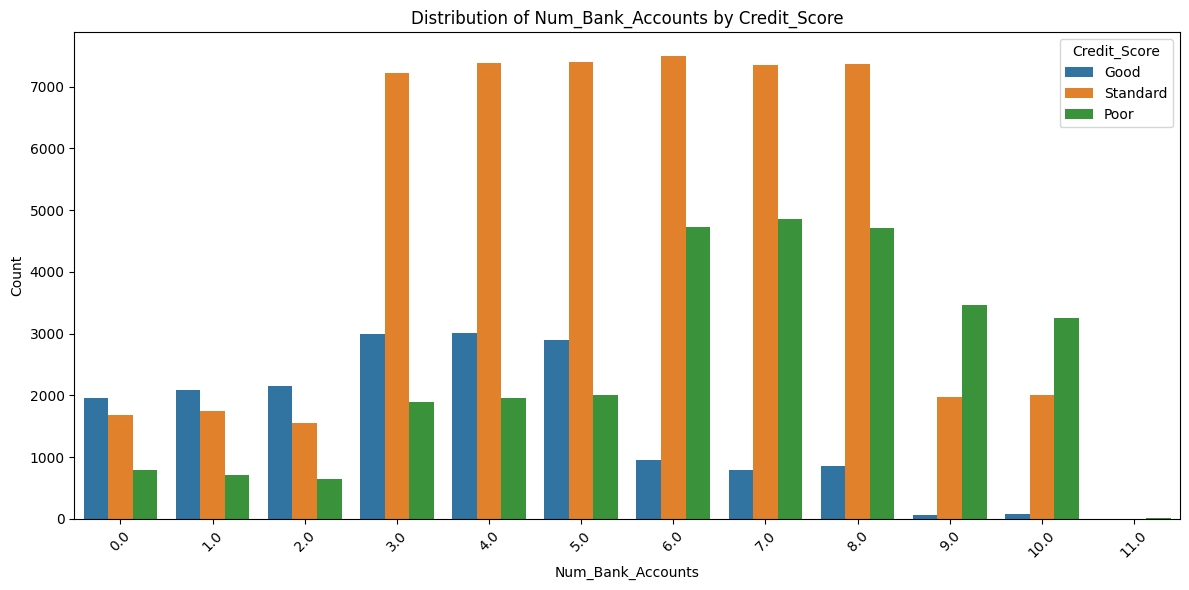

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_Bank_Accounts', hue='Credit_Score', data=data)
plt.title('Distribution of Num_Bank_Accounts by Credit_Score')
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*    More bank accounts might slightly relate to better credit scores.



# **(4)Histograms for Num_Credit_Card**

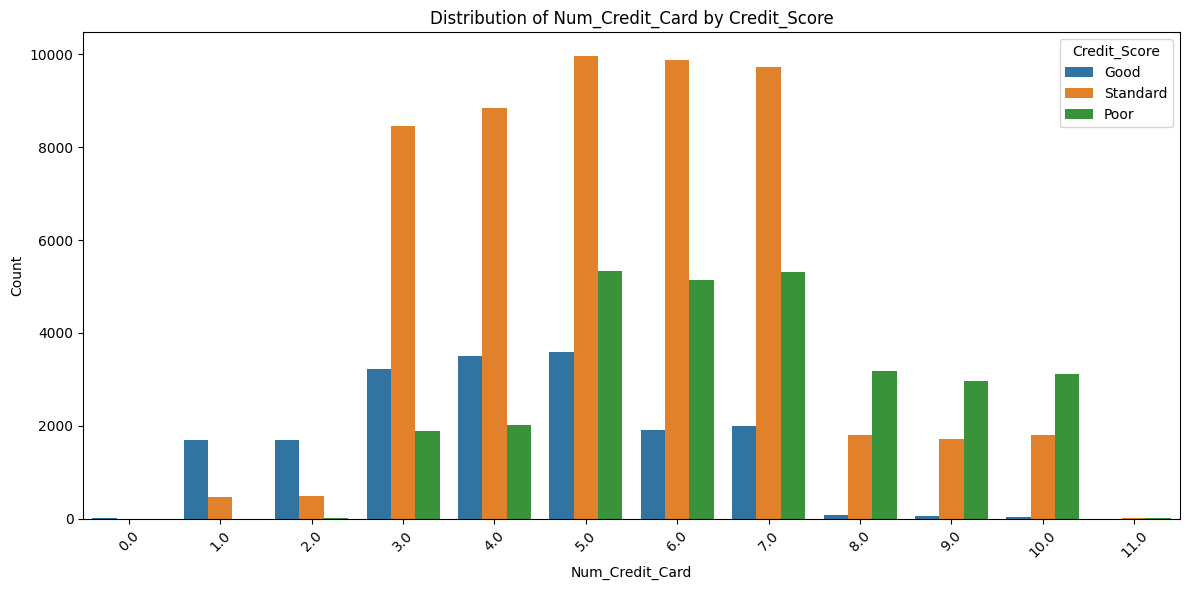

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_Credit_Card', hue='Credit_Score', data=data)
plt.title('Distribution of Num_Credit_Card by Credit_Score')
plt.xlabel('Num_Credit_Card')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   A higher number of credit cards is slightly associated with better credit scores



# **(5)Histograms for Interest_Rate**

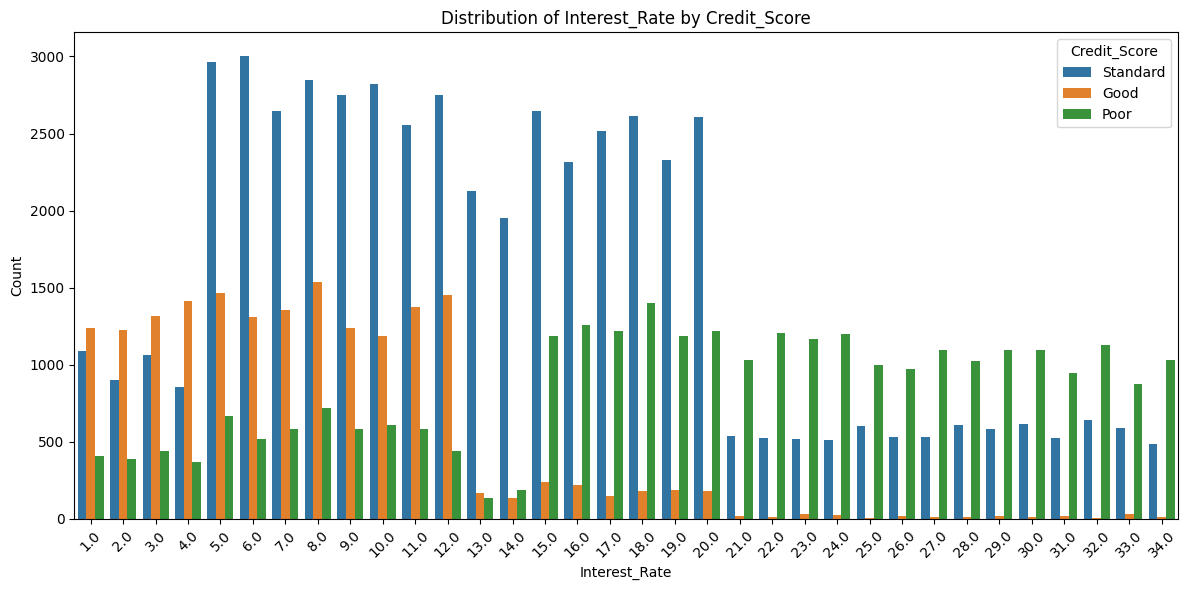

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Interest_Rate', hue='Credit_Score', data=data)
plt.title('Distribution of Interest_Rate by Credit_Score')
plt.xlabel('Interest_Rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   Higher interest rates are typically given to those with lower credit scores.



# **(6)Histograms for Num_of_Loan**

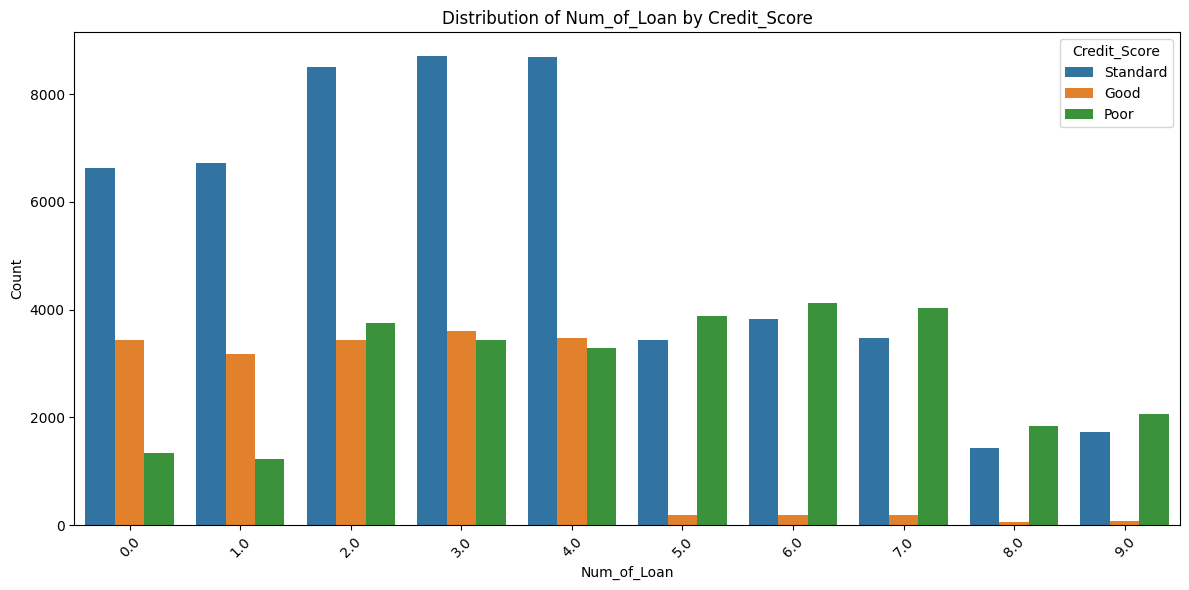

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_of_Loan', hue='Credit_Score', data=data)
plt.title('Distribution of Num_of_Loan by Credit_Score')
plt.xlabel('Num_of_Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   More loans are slightly associated with good credit scores.



# **(7)Histograms for Num_of_Delayed_Payment**

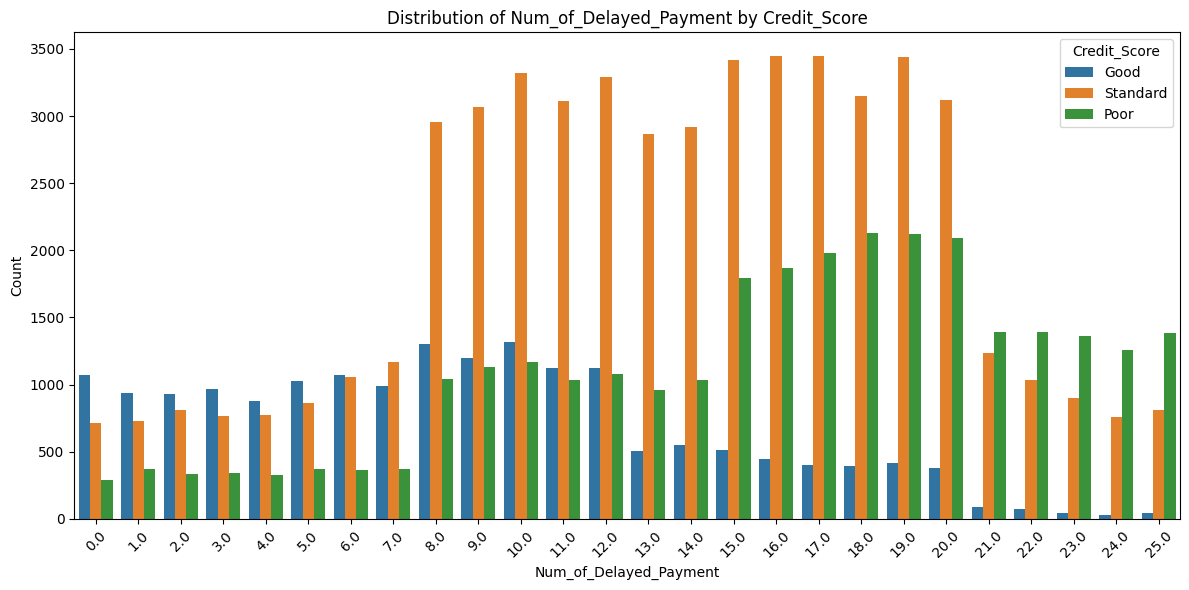

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_of_Delayed_Payment', hue='Credit_Score', data=data)
plt.title('Distribution of Num_of_Delayed_Payment by Credit_Score')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*    A higher number of delayed payments significantly reduces credit scores.



# **(8)Histograms for Num_Credit_Inquiries**

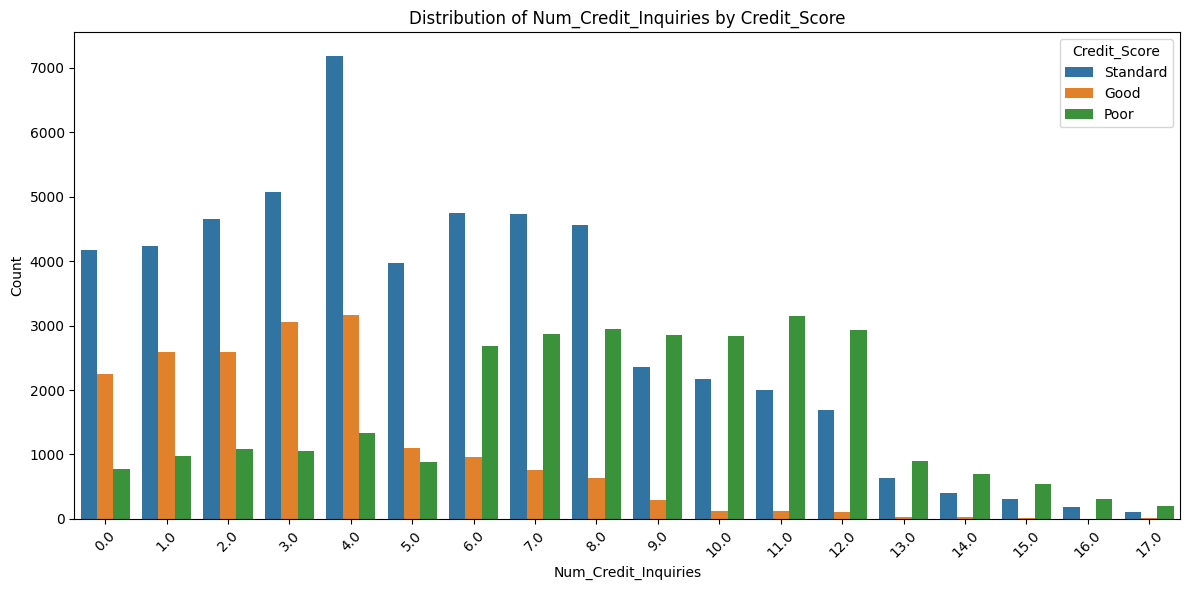

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_Credit_Inquiries', hue='Credit_Score', data=data)
plt.title('Distribution of Num_Credit_Inquiries by Credit_Score')
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   More credit inquiries might slightly lower credit scores.



# **(9)Histograms for Credit_History_Age**

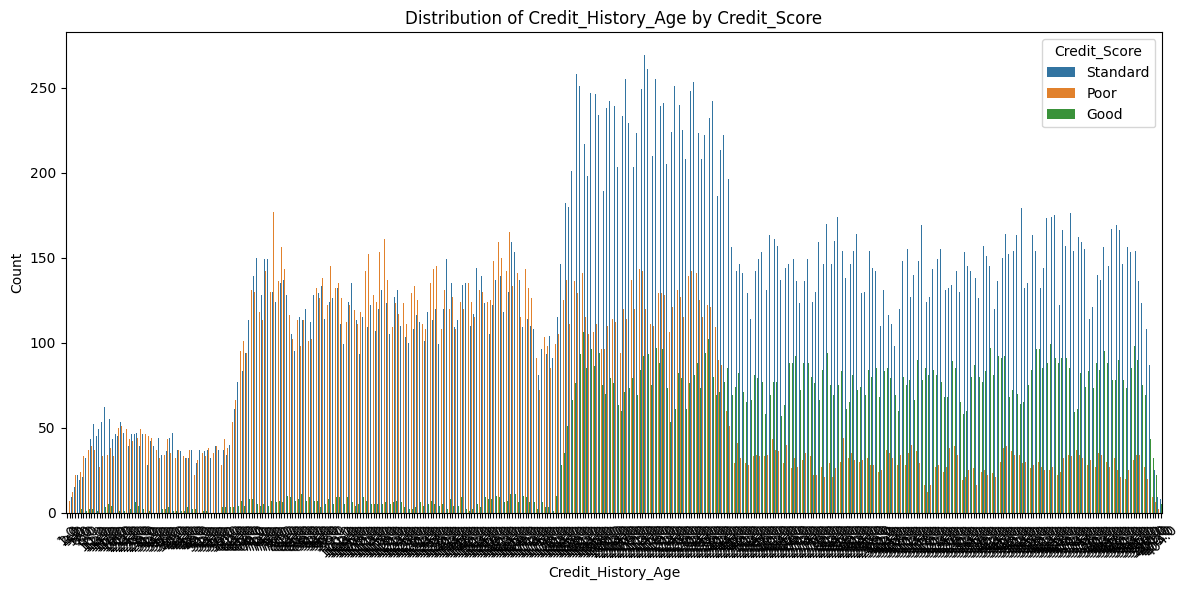

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_History_Age', hue='Credit_Score', data=data)
plt.title('Distribution of Credit_History_Age by Credit_Score')
plt.xlabel('Credit_History_Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*    Longer credit history is associated with better credit scores.



# **VISUALISATION**



*   **BIVARIATE ANALYSIS OF REMAINING NUMERICAL COLUMNS**



# **Correlation Heatmap**

In [ ]:
columns_of_interest=['ID', 'Customer_ID', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio','Credit_History_Age',
        'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

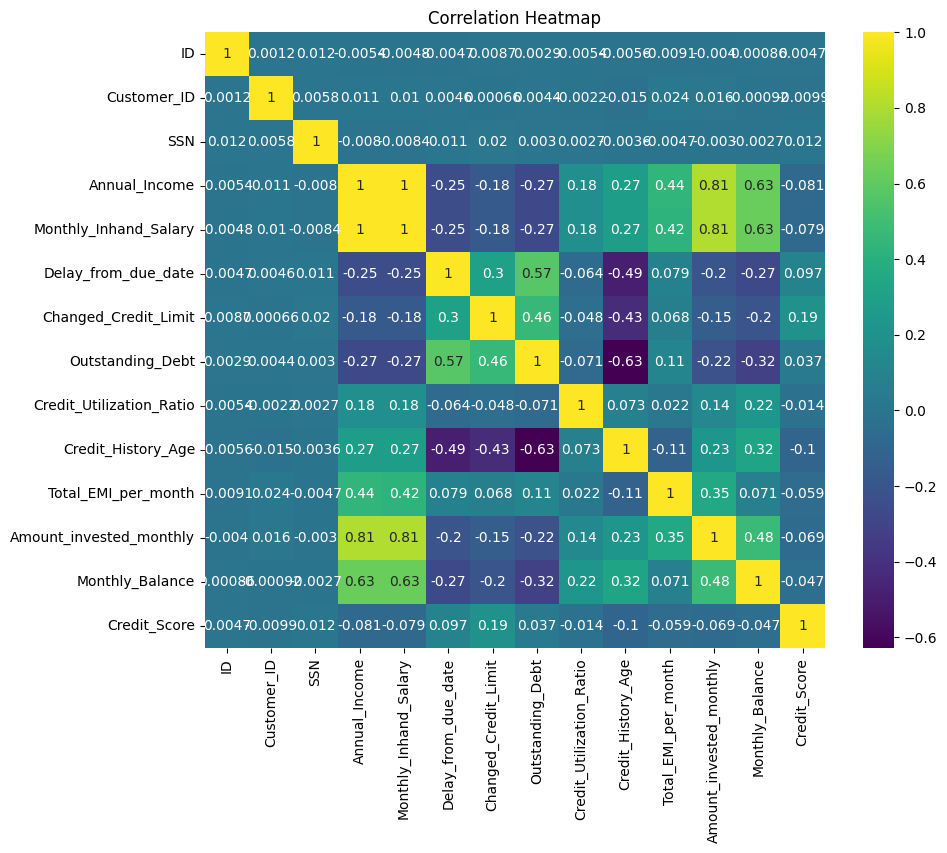

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns_of_interest + ['Credit_Score']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()



*   ID:No significant correlation with Credit_Score, as it is likely just an identifier with no impact on the score.

*  Customer_ID:Like ID, Customer_ID is an identifier and does not correlate with Credit_Score.
*   SSN:No correlation with Credit_Score as SSN is an identifier and not relevant to credit score directly.


*   Annual_Income: Weak positive correlation. Higher income slightly correlates with a better credit score, as higher income might lead to more financial stability.





*   Monthly_Inhand_Salary:Positive correlation, indicating that individuals with higher in-hand salaries generally have better credit scores.



*   Delay_from_due_date: Moderate negative correlation. More delays in payment are associated with lower credit scores.

*   Changed_Credit_Limit:Very weak positive correlation, indicating that changes in credit limit have minimal impact on credit scores.

*   Outstanding_Debt:Weak negative correlation. Higher outstanding debt is somewhat associated with lower credit scores.
*   Credit_Utilization_Ratio: Strong negative correlation. A higher credit utilization ratio strongly indicates lower credit scores.


*   Credit_History_Age:Moderate positive correlation. Longer credit history is associated with better credit scores.


*   Total_EMI_per_month: Weak negative correlation. Higher EMIs might slightly reduce credit scores due to the increased debt burden.


*  Amount_invested_monthly:Weak positive correlation. Investing more monthly might slightly improve credit scores.

*   Monthly_Balance: Moderate positive correlation. Higher monthly balances are associated with better credit scores.





# **Histograms for categorical features**

In [ ]:
categorical_col=data.select_dtypes(include=['object']).columns
categorical_col.drop('Credit_Score')

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

# **(1)Histograms for Occupation**

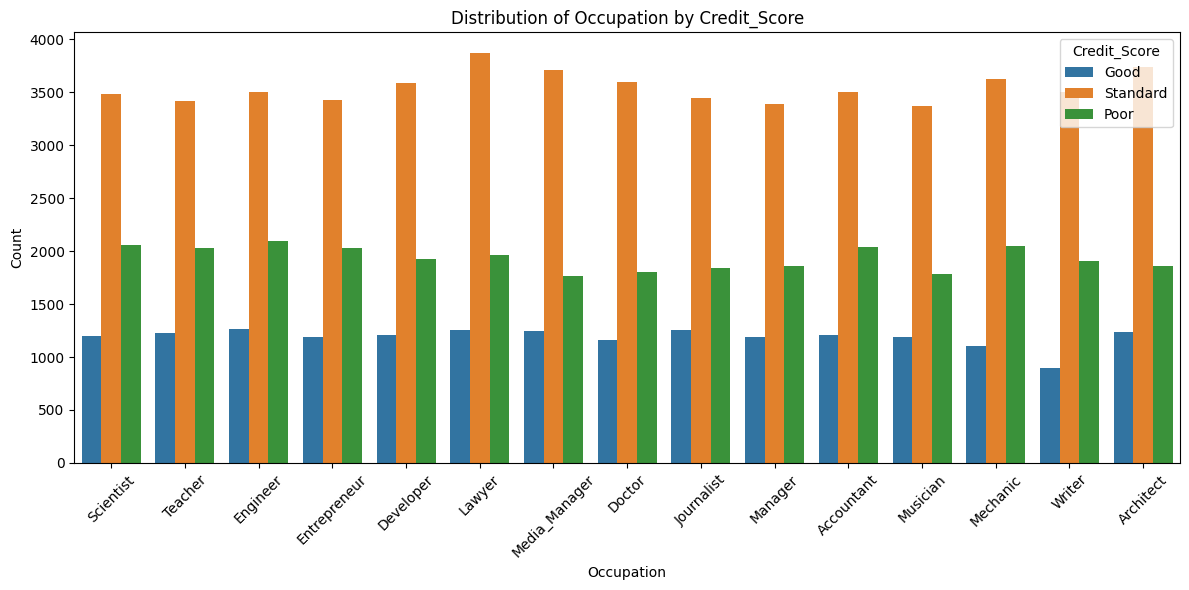

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=data)
plt.title('Distribution of Occupation by Credit_Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   Occupation: suggesting that occupation has minimal impact on credit scores.



# **(2)Histograms for Payment_Behaviour**

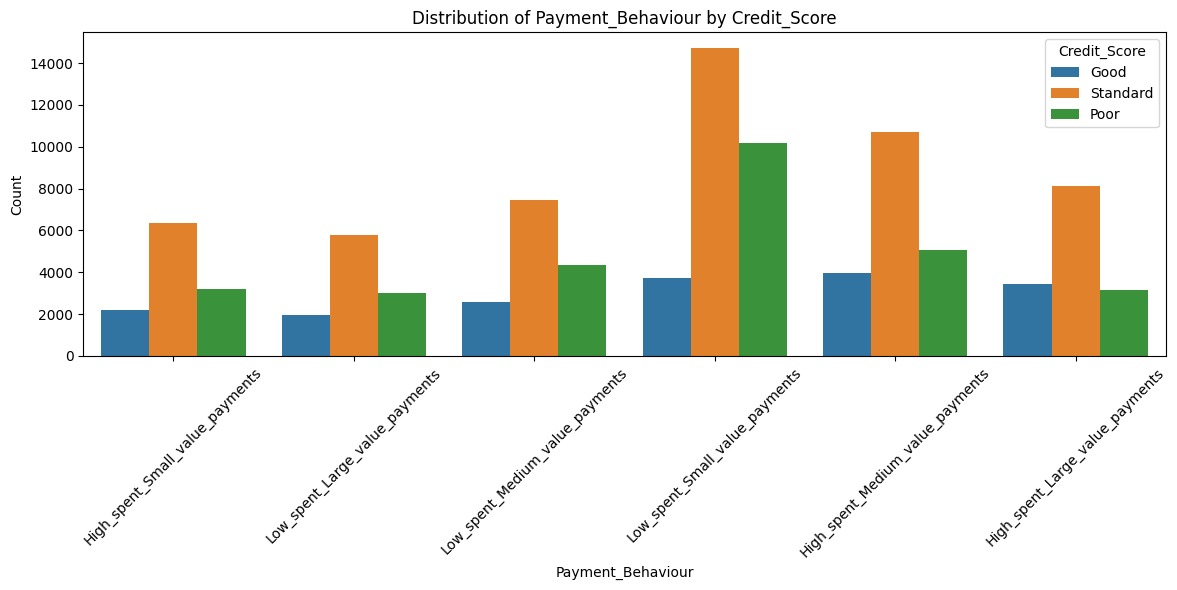

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=data)
plt.title('Distribution of Payment_Behaviour by Credit_Score')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   Payment_Behaviour: Poor payment behavior negatively impacts credit scores.



# **(3)Histograms for Payment_of_Min_Amount**

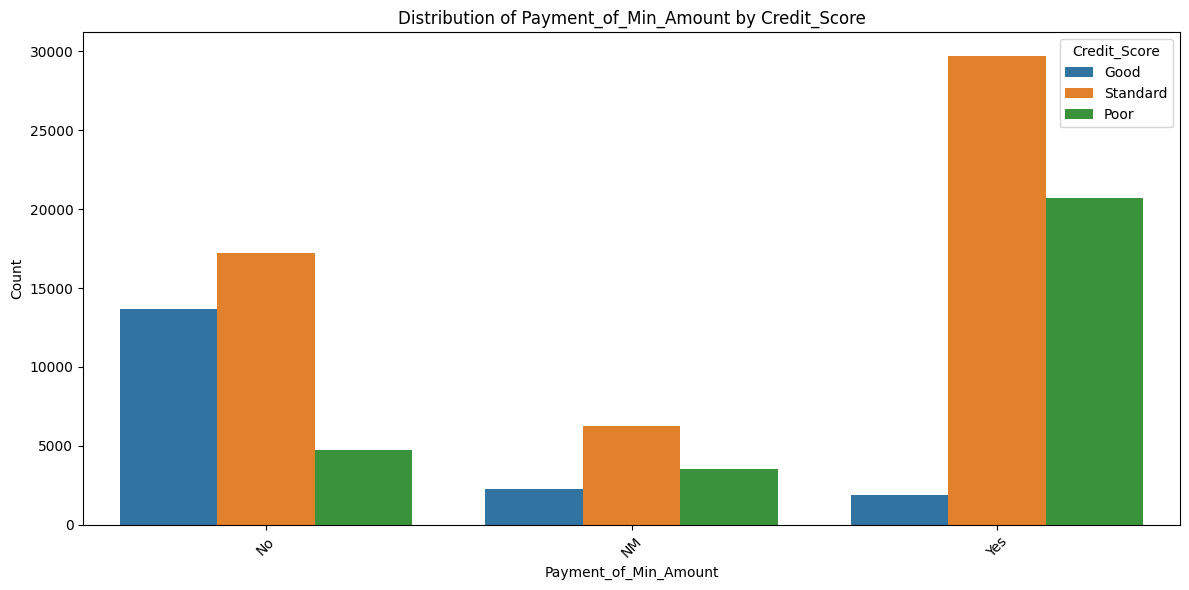

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=data)
plt.title('Distribution of Payment_of_Min_Amount by Credit_Score')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*   Payment_of_Min_Amount: Not paying the minimum amount can lower the credit score



# **(4)Histograms for Credit_Mix**

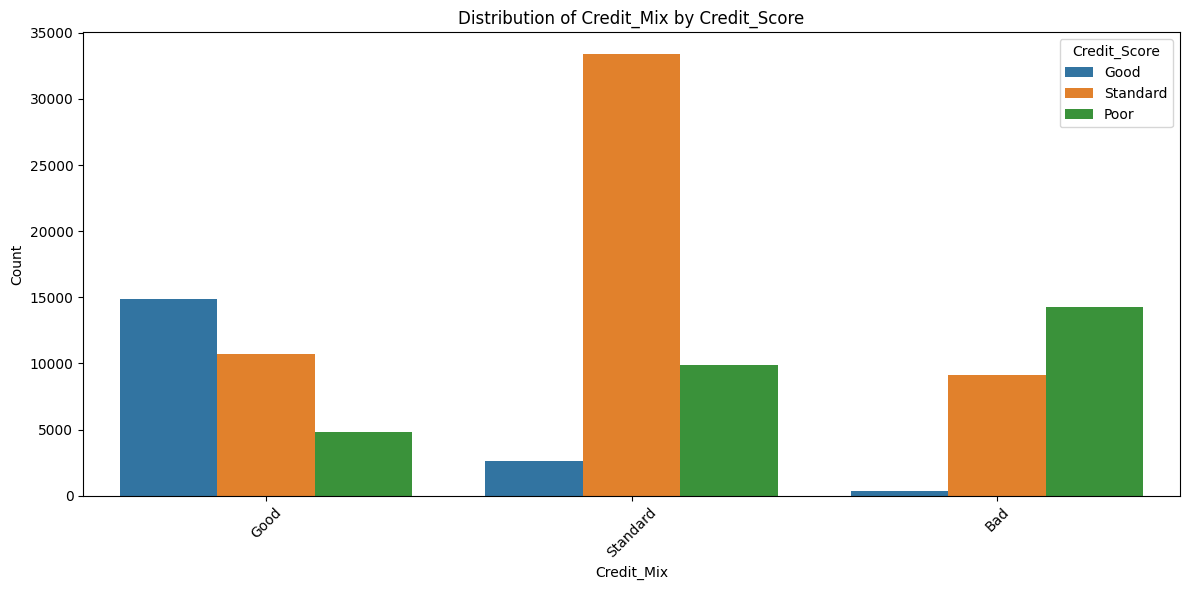

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=data)
plt.title('Distribution of Credit_Mix by Credit_Score')
plt.xlabel('Credit_Mix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
plt.show()



*    This suggests that variations in the Credit_Mix have a minimal impact on the Credit_Score.



# **(3)ENC0DING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
num_obj_col=['Credit_Score','Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Type_of_Loan','Occupation','Name']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ln=LabelEncoder()
for i in num_obj_col:
  data[i]=ln.fit_transform(data[i])

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  int64  
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  int64  
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  in

# **(4)SCALING**



*   STANDARDSCALAR



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
sc_data=sc.fit_transform(data)

In [ ]:
datascaled_new=pd.DataFrame(sc_data)
datascaled_new

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.731993,-1.575309,-1.527525,-1.738552,-0.958344,1.102169,1.171861,-0.831416,-0.754806,-0.913438,...,-0.274417,-0.543073,-1.067570,0.439200,-0.58149,-0.531061,-0.951119,-0.409455,-0.400095,-1.769439
1,-1.731970,-1.575309,-1.091089,-1.738552,-0.958344,1.102169,1.171861,-0.831416,-0.754806,-0.913438,...,-0.274417,-0.543073,-0.066486,0.449232,-0.58149,-0.531061,-0.951119,0.127796,-0.561962,-1.769439
2,-1.731947,-1.575309,-0.654654,-1.738552,-0.958344,1.102169,1.171861,-0.831416,-0.754806,-0.913438,...,-0.274417,-0.543073,-0.718380,0.459264,-0.58149,-0.531061,-0.951119,0.665046,-0.291375,-1.769439
3,-1.731924,-1.575309,-0.218218,-1.738552,-0.958344,1.102169,1.171861,-0.831416,-0.754806,-0.913438,...,-0.274417,-0.543073,-0.177317,0.469296,-0.58149,-0.531061,-0.951119,1.202296,-0.917344,-1.769439
4,-1.731901,-1.575309,0.218218,-1.738552,-0.958344,1.102169,1.171861,-0.831416,-0.754806,-0.913438,...,-0.274417,-0.543073,-1.463379,0.479328,-0.58149,-0.531061,-0.951119,-0.946705,-0.231662,-1.769439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.731901,0.833259,-0.218218,0.492901,-0.772552,-1.450100,0.475728,-0.282500,-0.260876,-0.527829,...,-0.274417,-0.826266,0.464826,1.572825,-0.58149,-0.687859,-0.874931,-1.483955,0.572169,-0.462094
99996,1.731924,0.833259,0.218218,0.492901,-0.772552,-1.450100,0.475728,-0.282500,-0.260876,-0.527829,...,-0.274417,-0.826266,1.618294,1.582857,-0.58149,-0.687859,-0.874931,-0.946705,0.669675,-0.462094
99997,1.731947,0.833259,0.654654,0.492901,-0.772552,-1.450100,0.475728,-0.282500,-0.260876,-0.527829,...,-0.274417,-0.826266,1.753123,1.592889,-0.58149,-0.687859,-0.874931,-1.483955,0.786770,-0.462094
99998,1.731970,0.833259,1.091089,0.492901,-0.772552,-1.450100,0.475728,-0.282500,-0.260876,-0.527829,...,-0.274417,-0.826266,0.264434,1.602921,-0.58149,-0.687859,-0.874931,0.127796,-0.361344,0.845251


In [ ]:
corr_matrix = data.corr()

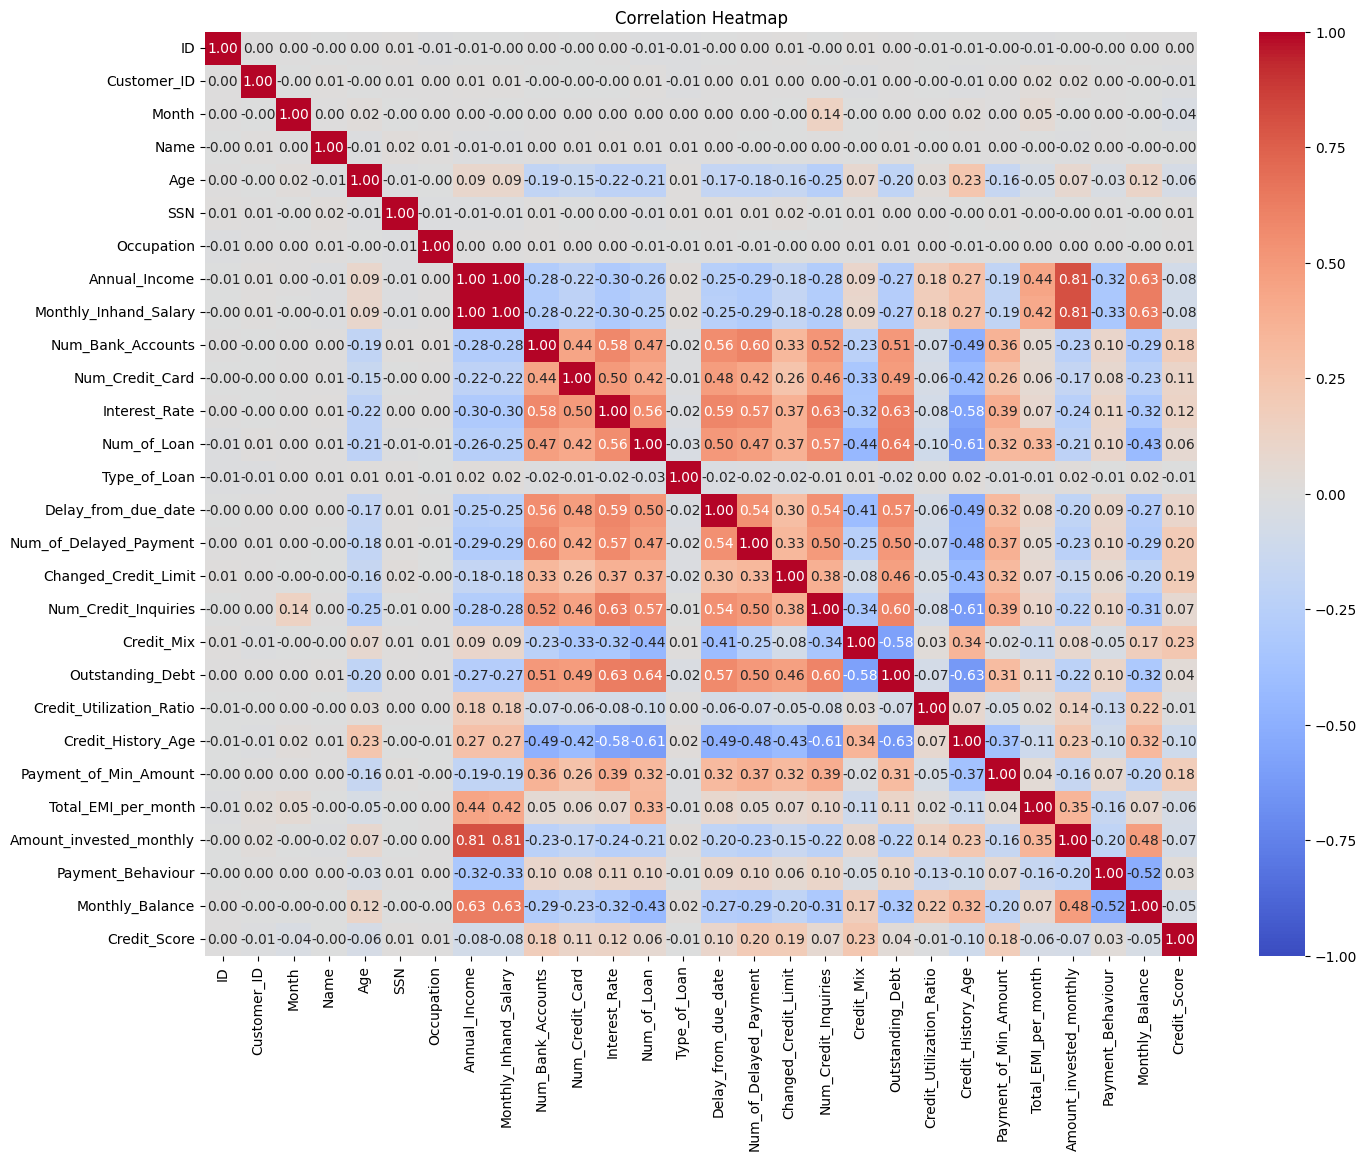

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



*   ID:No significant correlation with Credit_Score, as it is likely just an identifier with no impact on the score.


*   Customer_ID:Like ID, Customer_ID is an identifier and does not correlate with Credit_Score.


*   Name:No significant correlation with Credit_Score, as it is likely just an identifier with no impact on the score.



*   Month:Extremely low correlation with Credit_Score, suggesting that the specific month is not related to credit scores.


*   Age:Positive correlation. Older individuals tend to have better credit scores, possibly due to more established credit history.







*   SSN:No correlation with Credit_Score as SSN is an identifier and not relevant to credit score directly.



*   Annual_Income: Weak positive correlation. Higher income slightly correlates with a better credit score, as higher income might lead to more financial stability.

*   Monthly_Inhand_Salary:Positive correlation, indicating that individuals with higher in-hand salaries generally have better credit scores.

*   Num_Bank_Accounts:Weak positive correlation. More bank accounts might slightly relate to better credit scores.

*   Interest_Rate:Moderate negative correlation. Higher interest rates are typically given to those with lower credit scores.

*   Num_of_Loan:Weak negative correlation. More loans are slightly associated with lower credit scores.
*   Delay_from_due_date: Moderate negative correlation. More delays in payment are associated with lower credit scores.

*   Num_of_Delayed_Payment:Strong negative correlation. A higher number of delayed payments significantly reduces credit scores.


*   Changed_Credit_Limit:Very weak positive correlation, indicating that changes in credit limit have minimal impact on credit scores.
*   Num_Credit_Inquiries:Weak negative correlation. More credit inquiries might slightly lower credit scores.



*   Outstanding_Debt:Weak negative correlation. Higher outstanding debt is somewhat associated with lower credit scores.


*   Credit_Utilization_Ratio: Strong negative correlation. A higher credit utilization ratio strongly indicates lower credit scores.


*   Credit_History_Age:Moderate positive correlation. Longer credit history is associated with better credit scores.





*   Total_EMI_per_month: Weak negative correlation. Higher EMIs might slightly reduce credit scores due to the increased debt burden.


*   Amount_invested_monthly:Weak positive correlation. Investing more monthly might slightly improve credit scores.



*   Occupation:Very weak positive correlation, suggesting that occupation has minimal impact on credit scores.



*   Payment_of_Min_Amount:Weak negative correlation. Not paying the minimum amount can lower the credit score.

*   Payment_Behaviour:Moderate negative correlation. Poor payment behavior negatively impacts credit scores.
*   Monthly_Balance:Moderate positive correlation. Higher monthly balances are associated with better credit scores.



*   Num_Credit_Card:A weak negative correlation. More credit cards might slightly decrease the credit score.


*   Type_of_Loan:No significant correlation with the credit score.


*   credit mix :indicates a very weak positive relationship between Credit_Mix and Credit_Score. This suggests that variations in the Credit_Mix have a minimal impact on the Credit_Score.












In [4]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# **FEATURE REDUCTION**

In [5]:
data.drop(['ID','Customer_ID','Name','Month','SSN','Type_of_Loan','Annual_Income','Num_Bank_Accounts','Changed_Credit_Limit','Amount_invested_monthly',
           'Occupation','Credit_Mix','Num_of_Loan','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month',
           'Payment_of_Min_Amount','Num_Credit_Card'],axis=1,inplace=True)

In [6]:
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,High_spent_Medium_value_payments,341.489231,Good


In [9]:
data.shape

(100000, 10)

In [10]:
from google.colab import files

data.to_csv('NEW_FEATURE(10R)_CREDIT_DATA.csv', index=False)

# Download the file
files.download('NEW_FEATURE(10R)_CREDIT_DATA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **SPLITTING OF DATA**



*   FIRST SPLIT



In [ ]:
y=data['Credit_Score']
x=data.drop(['Credit_Score'],axis=1)



*   SECOND SPLIT



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)